# Telco Customer Churn Analysis

## Introduction
This dataset comes from Telco. The problem is interesting, since among the total number of entries given, there seems to be ~26% of the customers who left the service. There are 20 features (some of them are derived, for example, the 'TotalCharges' simply is the multiplication of 'tenure' and 'MonthlyCharges'). The objective is to correctly predict who leaves the survice and what causes customers to continue or opt out of the service. 

#### I'll start by importing the necessary libraries and creating the dataframe from a .csv file.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('telco.csv')

In [86]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's set the 'customer ID' to be the index of the dataframe. 

In [87]:
df = df.set_index('customerID')

In [88]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Analysis

In [89]:
df.shape

(7043, 20)

In [90]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [91]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod',]

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges',]

label = 'Churn'

In [92]:
for column_name in categorical_columns:
    print(df[column_name].value_counts())
    print('-'*40)

Male      3555
Female    3488
Name: gender, dtype: int64
----------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
----------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
----------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
----------------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
----------------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
----------------------------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
----------------------------------------
No                     3088
Yes                    2429
No internet servi

In [93]:
df[label].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [94]:
print("Churn Percentage: {:1f} %".format(186900/(1869+5174)))

Churn Percentage: 26.536987 %


In [95]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [96]:
missing_data_list = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

for customer in missing_data_list:
    print('data: ', df['TotalCharges'].iloc[customer], 'is blank.')

data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.


In [97]:
df.iloc[missing_data_list]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


In [98]:
df[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


In [99]:
missing_data_list = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

for customer in missing_data_list:
    df['TotalCharges'].iloc[customer] = df['tenure'].iloc[customer]*df['MonthlyCharges'].iloc[customer]

In [100]:
missing_data_list = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

for customer in missing_data_list:
    print('data: ', df['TotalCharges'].iloc[customer], 'is not blank.')

data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.


In [101]:
for i in missing_data_list:
#     print(df['tenure'].iloc[i])
#     print(df['MonthlyCharges'].iloc[i])
#     print(df['TotalCharges'].iloc[i])
    print(df['Churn'].iloc[i])

No
No
No
No
No
No
No
No
No
No
No


In [102]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [103]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Visualizations

In [104]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod',]

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges',]

In [105]:
new_cat_list = []
for idx in range(4):
    new_cat_list.append(categorical_columns[4*idx:4*idx+4])

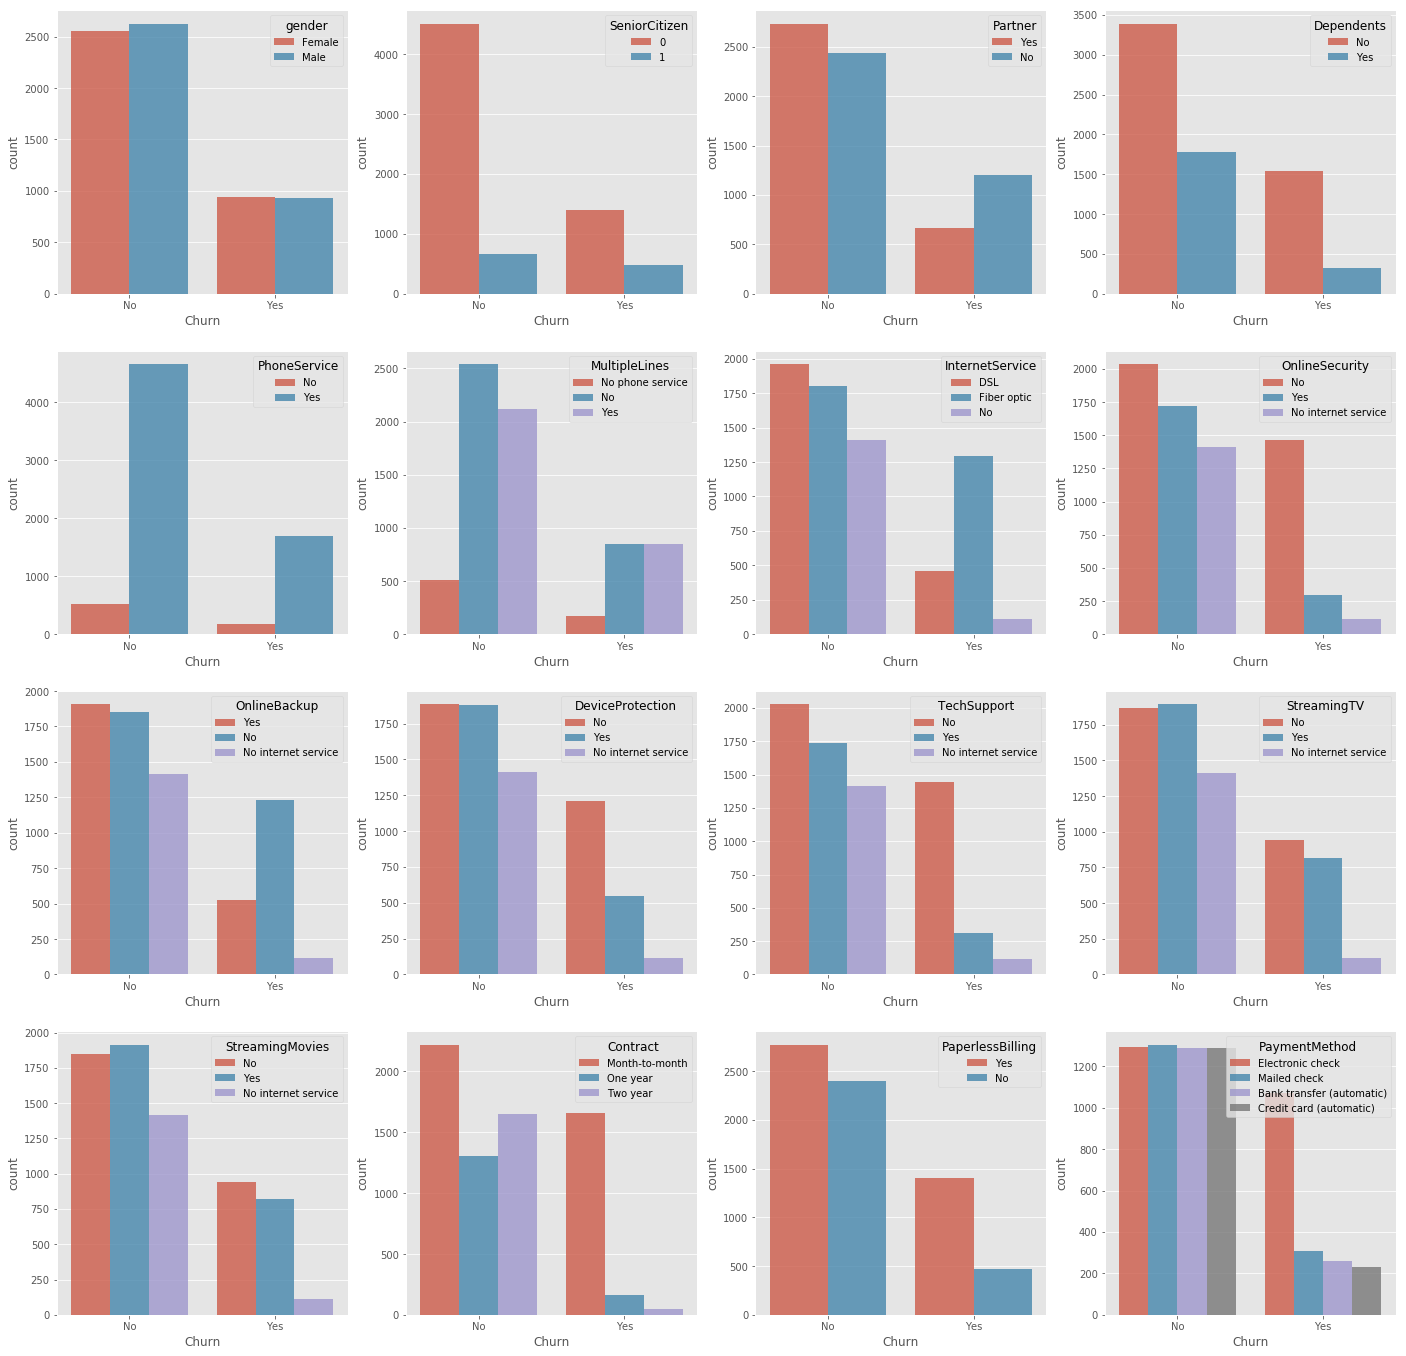

In [106]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(24,24))
for i in range(4):
    for j in range(4):
        sns.countplot(x='Churn', hue=new_cat_list[i][j], data=df, ax=axs[i,j], alpha=.8)
plt.show()

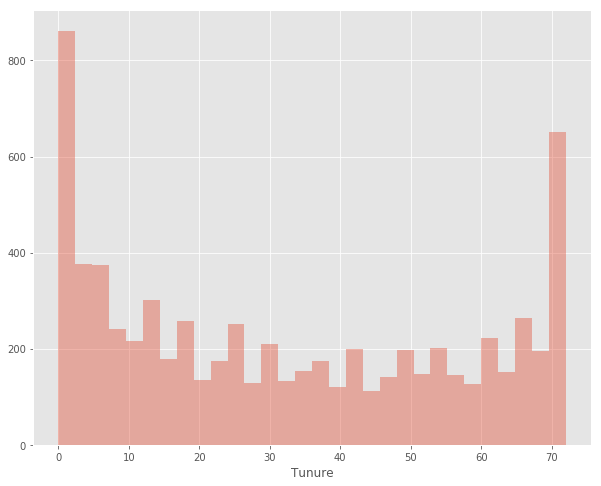

In [107]:
plt.figure(figsize=(10, 8))
sns.distplot(df['tenure'], bins=30, kde=False)
plt.xlabel('Tunure')
plt.show()

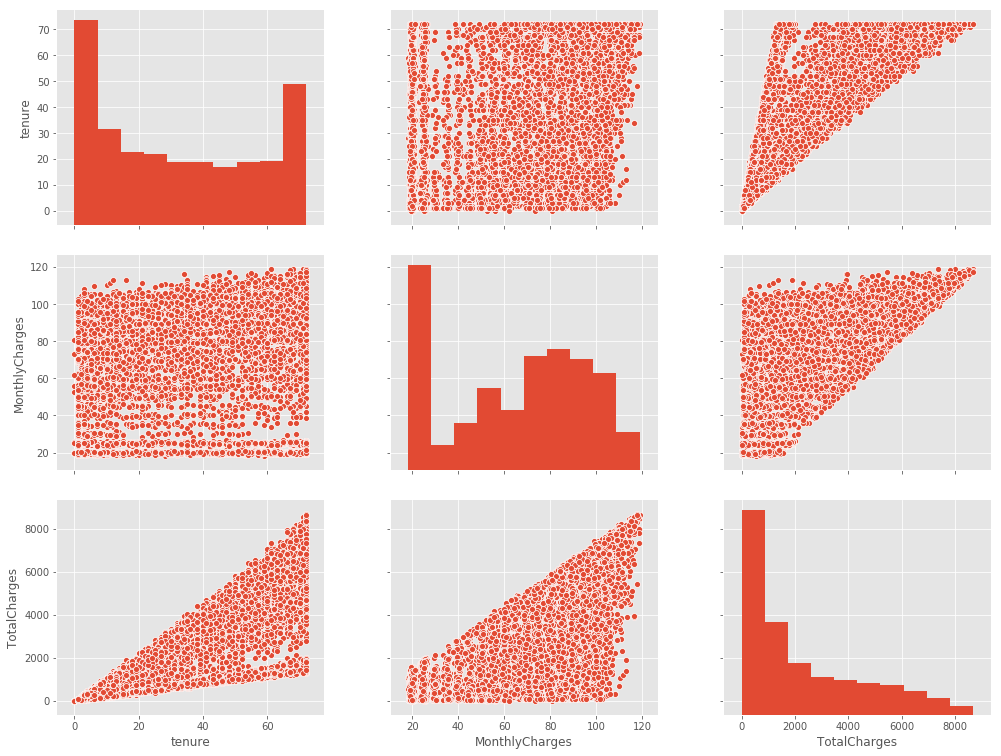

In [108]:
g = sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
g.fig.set_size_inches(15,11)

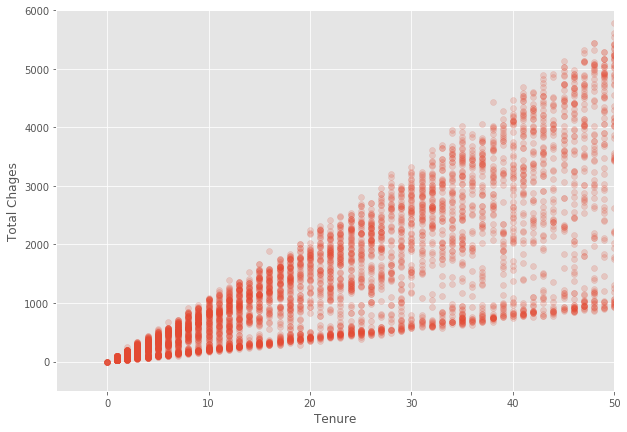

In [109]:
plt.figure(figsize=(10, 7))
plt.scatter(y=df['TotalCharges'], x=df['tenure'], alpha=.2,)
plt.xlabel('Tenure')
plt.ylabel('Total Chages')
plt.xlim(-5,50)
plt.ylim(-500,6000)
plt.show()

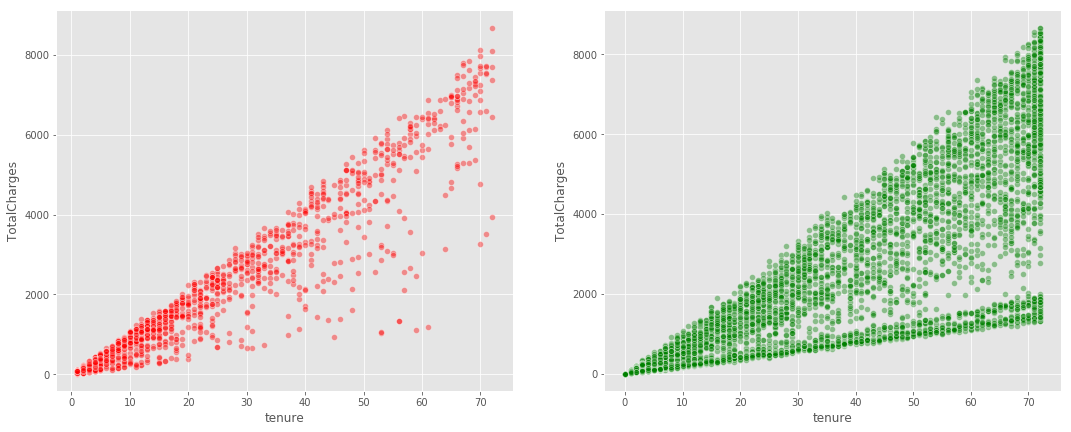

In [110]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(18, 7)
sns.scatterplot(x=df[df['Churn']=='Yes']['tenure'], 
                y=df[df['Churn']=='Yes']['TotalCharges'], 
                alpha=0.4, ax=axs[0], color='red')
sns.scatterplot(x=df[df['Churn']=='No']['tenure'], 
                y=df[df['Churn']=='No']['TotalCharges'], 
                alpha=0.4, ax=axs[1], color='green')
plt.show()

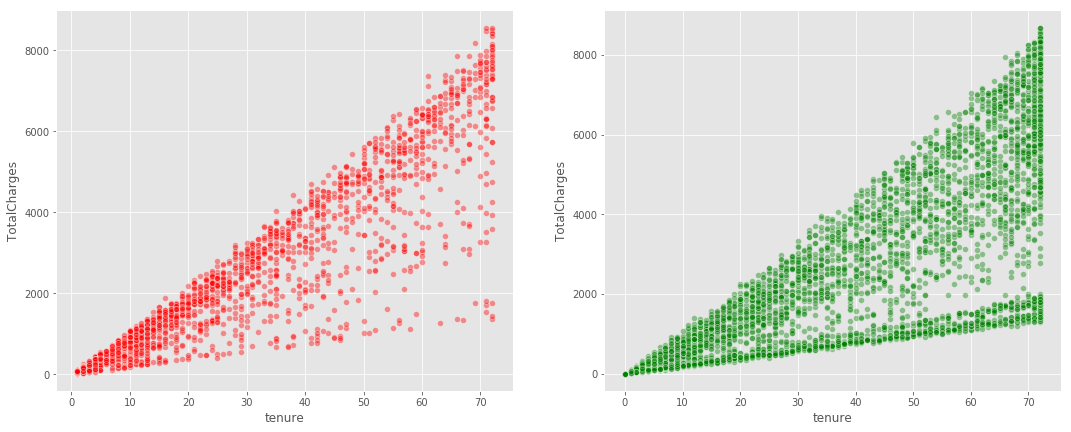

In [111]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(18, 7)
sns.scatterplot(x=df[df['PaymentMethod']=='Electronic check']['tenure'], 
                y=df[df['PaymentMethod']=='Electronic check']['TotalCharges'], 
                alpha=0.4, ax=axs[0], color='red')
sns.scatterplot(x=df[df['PaymentMethod']!='Electronic check']['tenure'], 
                y=df[df['PaymentMethod']!='Electronic check']['TotalCharges'], 
                alpha=0.4, ax=axs[1], color='green')
plt.show()

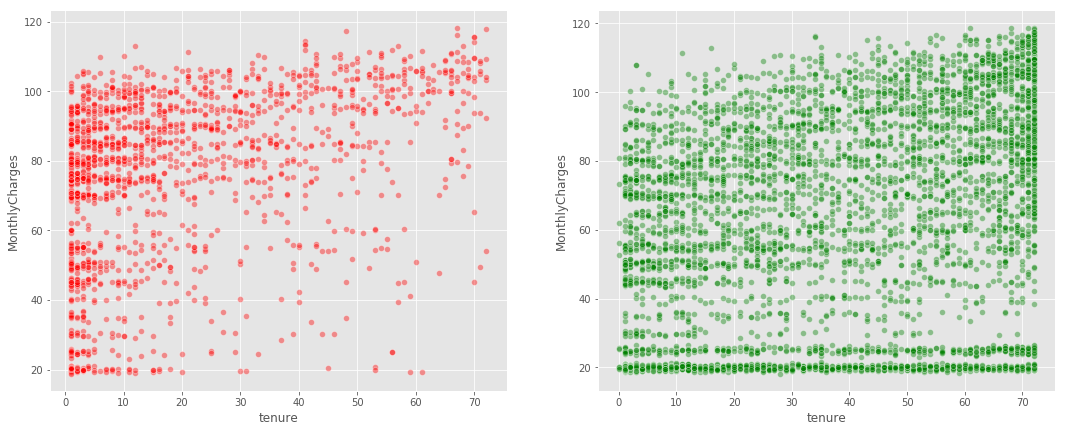

In [112]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(18, 7)
sns.scatterplot(x=df[df['Churn']=='Yes']['tenure'], y=df[df['Churn']=='Yes']['MonthlyCharges'], 
                alpha=0.4, ax=axs[0], color='red')
sns.scatterplot(x=df[df['Churn']=='No']['tenure'], y=df[df['Churn']=='No']['MonthlyCharges'], 
                alpha=0.4, ax=axs[1], color='green')
plt.show()

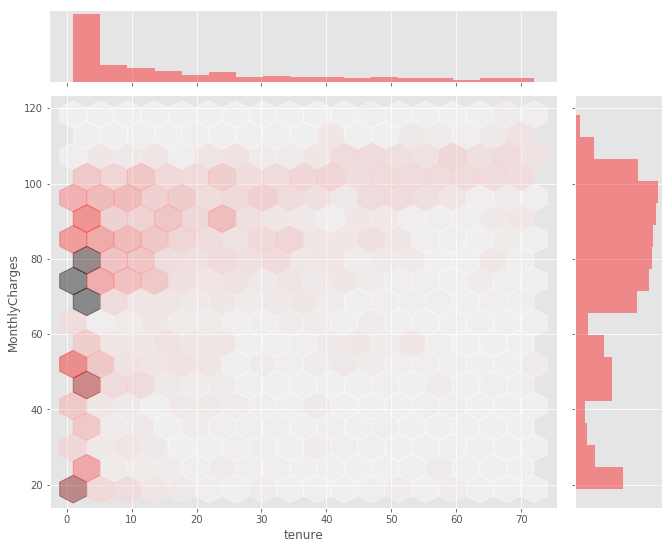

In [113]:
g = sns.jointplot(x=df[df['Churn']=='Yes']['tenure'], 
              y=df[df['Churn']=='Yes']['MonthlyCharges'], 
              alpha=0.4, color='red', kind="hex")
g.fig.set_size_inches(10,8)

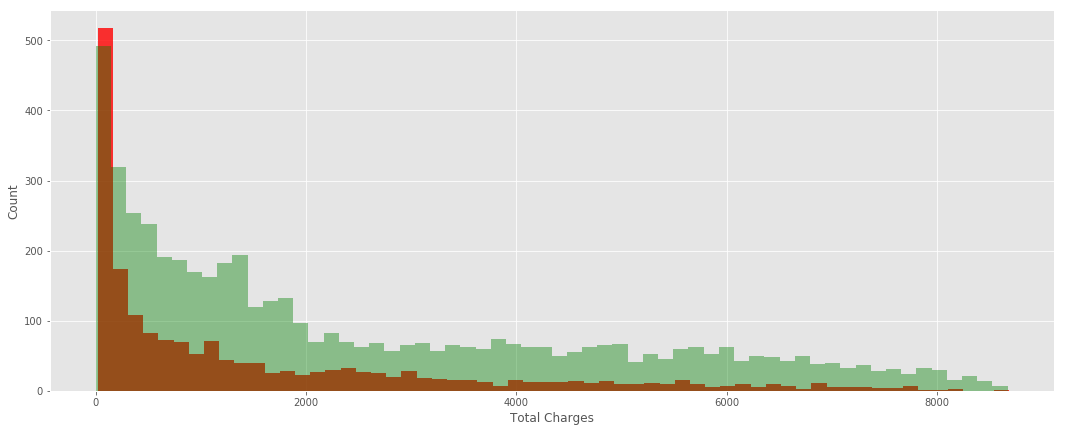

In [114]:
plt.figure(figsize=(18, 7))
plt.hist(df[df['Churn']=='Yes']['TotalCharges'], bins=60, alpha=0.8, color='red')
plt.hist(df[df['Churn']=='No']['TotalCharges'], bins=60, alpha=0.4, color='green')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

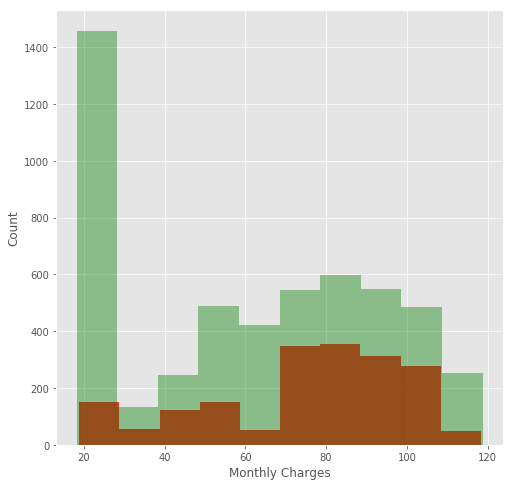

In [115]:
plt.figure(figsize=(8, 8))
plt.hist(df[df['Churn']=='Yes']['MonthlyCharges'], bins=10, alpha=0.8, color='red')
plt.hist(df[df['Churn']=='No']['MonthlyCharges'], bins=10, alpha=0.4, color='green')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

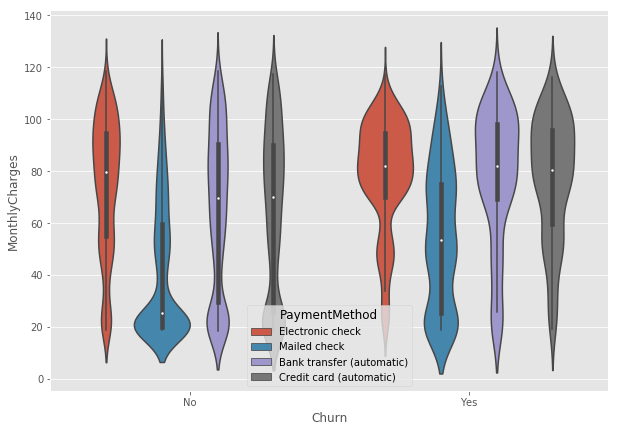

In [116]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, hue='PaymentMethod')
plt.show()

## Feature Engineering

In [117]:
df_new = df.drop(['gender', 'TotalCharges'], axis=1)

In [118]:
#df_new.head()

In [119]:
df_ohe = pd.get_dummies(df_new, 
               columns=['Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                        'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']) 

In [120]:
df_ohe = df_ohe.drop(['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 
                  'DeviceProtection_No internet service', 'TechSupport_No internet service', 
                  'StreamingTV_No internet service', 'StreamingMovies_No internet service'], axis=1)

In [121]:
df_ohe = df_ohe.drop(['Partner_No', 'Dependents_No', 'MultipleLines_No', 'PhoneService_No', 
                      'MultipleLines_No phone service', 'StreamingTV_No', 'StreamingMovies_No',
                      'OnlineSecurity_No', 'DeviceProtection_No',
                      'PaperlessBilling_No', 'Churn_No'], 
                     axis=1)

In [122]:
df_ohe.head()

,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,0,34,56.95,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3668-QPYBK,0,2,53.85,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,1
7795-CFOCW,0,45,42.30,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
9237-HQITU,0,2,70.70,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1


In [123]:
df_ohe.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

## Train-Test Split

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X = df_ohe.drop('Churn_Yes', axis=1)
y = df_ohe['Churn_Yes']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=202)

## Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
logistic_model = LogisticRegression()

In [129]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
logistic_predict = logistic_model.predict(X_test)

In [131]:
from sklearn.metrics import classification_report, confusion_matrix

In [132]:
print(classification_report(y_test, logistic_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       522
           1       0.69      0.57      0.62       183

   micro avg       0.82      0.82      0.82       705
   macro avg       0.77      0.74      0.75       705
weighted avg       0.81      0.82      0.82       705



In [134]:
print(confusion_matrix(y_test, logistic_predict))

[[475  47]
 [ 79 104]]


In [135]:
df_result = pd.DataFrame({'Coefficient': list(X.columns), 'Value': list(1/logistic_model.coef_[0])})

In [136]:
df_result.sort_values(by=['Value'])

,Coefficient,Value
3,Partner_Yes,-226.053448
2,MonthlyCharges,-207.121333
1,tenure,-29.050542
25,PaymentMethod_Mailed check,-6.084774
19,Contract_One year,-6.003441
4,Dependents_Yes,-5.180570
22,PaymentMethod_Bank transfer (automatic),-4.231655
23,PaymentMethod_Credit card (automatic),-3.519700
10,OnlineSecurity_Yes,-3.395043
5,PhoneService_Yes,-2.921495


## Support Vector Machine

In [137]:
from sklearn.svm import SVC

In [138]:
svc_model = SVC()

In [139]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [140]:
svc_predict = svc_model.predict(X_test)

In [141]:
print(confusion_matrix(y_test, svc_predict))

[[474  48]
 [ 92  91]]


In [142]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       522
           1       0.65      0.50      0.57       183

   micro avg       0.80      0.80      0.80       705
   macro avg       0.75      0.70      0.72       705
weighted avg       0.79      0.80      0.79       705



In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
grid_param = {'C':[10,100, 1000, 10000],'gamma':[1,0.1,0.01,0.001, 0.0001,0.00001]}

In [145]:
grid = GridSearchCV(SVC(), grid_param, verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] gamma=1, C=10 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... gamma=1, C=10, score=0.7699952673923331, total=   2.5s
[CV] gamma=1, C=10 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] .......... gamma=1, C=10, score=0.7486985328916232, total=   2.2s
[CV] gamma=1, C=10 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


[CV] .......... gamma=1, C=10, score=0.7528409090909091, total=   2.6s
[CV] gamma=0.1, C=10 .................................................
[CV] ........ gamma=0.1, C=10, score=0.7539044013251301, total=   2.6s
[CV] gamma=0.1, C=10 .................................................
[CV] ........ gamma=0.1, C=10, score=0.7614765735920492, total=   3.2s
[CV] gamma=0.1, C=10 .................................................
[CV] ......... gamma=0.1, C=10, score=0.759469696969697, total=   3.0s
[CV] gamma=0.01, C=10 ................................................
[CV] ....... gamma=0.01, C=10, score=0.7917652626597255, total=   1.6s
[CV] gamma=0.01, C=10 ................................................
[CV] ....... gamma=0.01, C=10, score=0.7898722195929957, total=   1.6s
[CV] gamma=0.01, C=10 ................................................
[CV] ....... gamma=0.01, C=10, score=0.7845643939393939, total=   1.5s
[CV] gamma=0.001, C=10 ...............................................
[CV] .

[CV] .... gamma=0.01, C=10000, score=0.7363937529578798, total=  28.4s
[CV] gamma=0.01, C=10000 .............................................
[CV] .... gamma=0.01, C=10000, score=0.7231424514907714, total=  21.5s
[CV] gamma=0.01, C=10000 .............................................
[CV] .... gamma=0.01, C=10000, score=0.7168560606060606, total=  33.1s
[CV] gamma=0.001, C=10000 ............................................
[CV] ... gamma=0.001, C=10000, score=0.7875059157595835, total=  23.2s
[CV] gamma=0.001, C=10000 ............................................
[CV] ... gamma=0.001, C=10000, score=0.7818267865593942, total=  22.9s
[CV] gamma=0.001, C=10000 ............................................
[CV] ... gamma=0.001, C=10000, score=0.7878787878787878, total=  20.4s
[CV] gamma=0.0001, C=10000 ...........................................
[CV] .. gamma=0.0001, C=10000, score=0.8017037387600567, total=   8.6s
[CV] gamma=0.0001, C=10000 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  7.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05], 'C': [10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [146]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [147]:
svc_grid_predict = grid.predict(X_test)

In [148]:
print(confusion_matrix(y_test,svc_grid_predict))

[[486  36]
 [ 94  89]]


In [149]:
print(classification_report(y_test,svc_grid_predict))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       522
           1       0.71      0.49      0.58       183

   micro avg       0.82      0.82      0.82       705
   macro avg       0.77      0.71      0.73       705
weighted avg       0.81      0.82      0.80       705



## k-Nearest Neighbors

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
kNN_model = KNeighborsClassifier(n_neighbors=100)

In [202]:
kNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [203]:
knn_predict = kNN_model.predict(X_test)

In [204]:
print(confusion_matrix(y_test, knn_predict))

[[481  41]
 [ 93  90]]


In [205]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       522
           1       0.69      0.49      0.57       183

   micro avg       0.81      0.81      0.81       705
   macro avg       0.76      0.71      0.73       705
weighted avg       0.80      0.81      0.80       705



In [212]:
error_list = []

for i in range(1,100):
    kNN_model = KNeighborsClassifier(n_neighbors=i)
    kNN_model.fit(X_train, y_train)
    predictions_i = kNN_model.predict(X_test)
    error_list.append(np.mean(predictions_i != y_test))

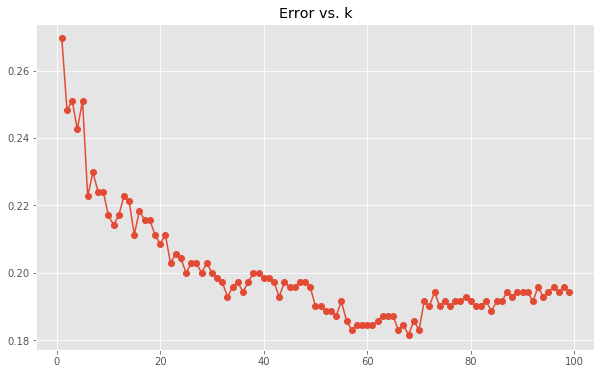

In [213]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_list,marker='o')
plt.title('Error vs. k')
plt.show()

In [216]:
kNN_model = KNeighborsClassifier(n_neighbors=70)
kNN_model.fit(X_train,y_train)
knn_predict = kNN_model.predict(X_test)
print('Confusion Matrix:\n {}'.format(confusion_matrix(y_test, knn_predict)))
print('----------------------------')
print('Classification Report:\n {}'.format(classification_report(y_test, knn_predict)))

Confusion Matrix:
 [[486  36]
 [ 93  90]]
----------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       522
           1       0.71      0.49      0.58       183

   micro avg       0.82      0.82      0.82       705
   macro avg       0.78      0.71      0.73       705
weighted avg       0.81      0.82      0.80       705



## K-Means Clustering (Note, this is an unsupervised algorithm!)

In [217]:
from sklearn.cluster import KMeans

In [218]:
kmeans_model = KMeans(n_clusters=2)

In [219]:
kmeans_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [220]:
kmeans_model.cluster_centers_

array([[7.38675958e-02, 2.52623693e+01, 3.30027875e+01, 4.19860627e-01,
        3.49128920e-01, 7.96864111e-01, 1.70034843e-01, 4.68292683e-01,
        1.52655666e-14, 5.31707317e-01, 1.51219512e-01, 3.30662021e-01,
        1.37630662e-01, 1.17073171e-01, 3.27874564e-01, 1.40418118e-01,
        9.02439024e-02, 9.19860627e-02, 5.34146341e-01, 2.06968641e-01,
        2.58885017e-01, 4.11498258e-01, 1.91289199e-01, 1.98606272e-01,
        2.03135889e-01, 4.06968641e-01],
       [2.22861251e-01, 3.72602444e+01, 8.66040259e+01, 5.26479751e-01,
        2.65516415e-01, 9.76276060e-01, 5.95015576e-01, 2.58087707e-01,
        7.41912293e-01, 2.17326157e-14, 3.79822670e-01, 5.12580877e-01,
        4.87419123e-01, 4.99880182e-01, 6.06757728e-01, 3.93242272e-01,
        5.86628325e-01, 5.91421040e-01, 5.61226935e-01, 2.10639827e-01,
        2.28133237e-01, 7.16510903e-01, 2.38437575e-01, 2.28133237e-01,
        4.27030913e-01, 1.06398275e-01]])

In [221]:
print(confusion_matrix(y, kmeans_model.labels_))

[[2374 2800]
 [ 496 1373]]


In [222]:
print(classification_report(y, kmeans_model.labels_))

              precision    recall  f1-score   support

           0       0.83      0.46      0.59      5174
           1       0.33      0.73      0.45      1869

   micro avg       0.53      0.53      0.53      7043
   macro avg       0.58      0.60      0.52      7043
weighted avg       0.69      0.53      0.55      7043



## Decision Trees

In [223]:
from sklearn.tree import DecisionTreeClassifier

In [224]:
dtree = DecisionTreeClassifier()

In [225]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [226]:
tree_predict = dtree.predict(X_test)

In [227]:
print(classification_report(y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       522
           1       0.46      0.48      0.47       183

   micro avg       0.72      0.72      0.72       705
   macro avg       0.63      0.64      0.64       705
weighted avg       0.72      0.72      0.72       705



In [228]:
print(confusion_matrix(y_test, tree_predict))

[[418 104]
 [ 96  87]]


## Random Forest

In [229]:
from sklearn.ensemble import RandomForestClassifier

In [230]:
rfc = RandomForestClassifier(n_estimators=200)

In [232]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [233]:
rfc_predict = rfc.predict(X_test)

In [234]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       522
           1       0.64      0.51      0.57       183

   micro avg       0.80      0.80      0.80       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.79      0.80      0.79       705



In [235]:
print(confusion_matrix(y_test, rfc_predict))

[[470  52]
 [ 89  94]]
